***Part one***:<br>
**Introduce the data briefly:**<br>
The data we used in this project is about bike sharing(**Divvy** is Chicago's bike share system, with over 600 stations and 6,000+ bikes across Chicagoland. It’s a fun, affordable and convenient way to get around). We get the data from https://www.divvybikes.com/system-data. This website offers historical trip data in Chicago. The trip data is released twice a year: once following the end of calendar Q2 and once following the end of calendar Q4. This data is provided according to the Divvy Data License Agreement.<br>
**The reason why we choose the data**<br>
Bike sharing is very popular in china. However,from time to time we can see some negative information from newspapers or Internet. We want to know how the bike-share market is going abroad. Therefore, we choose this data to explore in our project.


***Part two:***<br>
**collect data**

In [9]:
#download some pictures from web
from IPython.display import Image
from IPython.core.display import HTML,display 
Image(url= "https://d21xlh2maitm24.cloudfront.net/chi/_800x500_crop_bottom-center_100/Divvy_Explore_test_190820_164722.jpg?mtime=20190820164722",width=930)

In [24]:
#download some pictures from web
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://d21xlh2maitm24.cloudfront.net/chi/Divvy_Explore_Hero_test.png?mtime=20190820171851",width=930)

we write some codes to collect the data automatically .There are four csv files which represent different quarter respectively ,and each csv file is 100M+

Don't run the codes below,it will take time...

In [1]:
#collect data from website
import requests 
#download Q1
print ("downloading with requests")
url = 'https://s3.amazonaws.com/divvy-data/tripdata/https://s3.amazonaws.com/divvy-data/tripdata/Divvy_Trips_2018_Q1.zip' 
r = requests.get(url) 
with open("Divvy_Trips_2018_Q1.zip", "wb") as code:
    code.write(r.content)
print('downloaded')
print()
#download Q2
print ("downloading with requests")
url = 'https://s3.amazonaws.com/divvy-data/tripdata/https://s3.amazonaws.com/divvy-data/tripdata/Divvy_Trips_2018_Q2.zip' 
r = requests.get(url) 
with open("Divvy_Trips_2018_Q2.zip", "wb") as code:
    code.write(r.content)
print('downloaded')
print()
#download Q3
print ("downloading with requests")
url = 'https://s3.amazonaws.com/divvy-data/tripdata/https://s3.amazonaws.com/divvy-data/tripdata/Divvy_Trips_2018_Q3.zip' 
r = requests.get(url) 
with open("Divvy_Trips_2018_Q3.zip", "wb") as code:
    code.write(r.content)
print('downloaded')
print()
#download Q4
print ("downloading with requests")
url = 'https://s3.amazonaws.com/divvy-data/tripdata/https://s3.amazonaws.com/divvy-data/tripdata/Divvy_Trips_2018_Q4.zip' 
r = requests.get(url) 
with open("Divvy_Trips_2018_Q4.zip", "wb") as code:
    code.write(r.content)
print('downloaded')
print()

downloading with requests


KeyboardInterrupt: 

***Part three:***<br>
**Data processing**<br>
First of all,we try to merge four csv files into one.<br>
Secondly, we try to check out whether columns have missing values.<br>
Then, we use some functions to fill the missing values(some functions used in Part four).<br>



In [1]:
import seaborn as sns

import datetime
import matplotlib.pyplot as plt 
import matplotlib
from collections import Counter#we can use 'Counter' to count how many times an elemenet appears

import time
import numpy as np


In [2]:
# read file for Q1
import pandas as pd
from pandas import DataFrame,Series
dt1=pd.read_csv('Divvy_Trips_2018_Q1.csv',thousands=',')
dt1['Quarter']='Q1'#add a new column
t=Series(dt1.columns)
t.name='columns in the file'
print(t)
print("Q1 file shape",dt1.shape)
print (dt1.dtypes)
print()

#read file for Q2
dt2=pd.read_csv('Divvy_Trips_2018_Q2.csv',thousands=',')
dt2['Quarter']='Q2'
print("Q2 file shape",dt2.shape)
print(dt2.dtypes)
print()
#read file for Q3
dt3=pd.read_csv('Divvy_Trips_2018_Q3.csv',thousands=',')
dt3['Quarter']='Q3'
print("Q3 file shape",dt3.shape)
print(dt3.dtypes)
print()
#read file for Q4
dt4=pd.read_csv('Divvy_Trips_2018_Q4.csv',thousands=',')
dt4['Quarter']='Q4'
print("Q4 file shape",dt4.shape)
print(dt4.dtypes)
print()


0               trip_id
1            start_time
2              end_time
3                bikeid
4          tripduration
5       from_station_id
6     from_station_name
7         to_station_id
8       to_station_name
9              usertype
10               gender
11            birthyear
12              Quarter
Name: columns in the file, dtype: object
Q1 file shape (387145, 13)
trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration         float64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
Quarter               object
dtype: object

Q2 file shape (1059681, 13)
trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration         float64
from_station_id        int64
from_station_name     obje

In [3]:
#merging four files into one
dt=pd.concat([dt1,dt2,dt3,dt4],ignore_index=True)#ignore the index first
dt = dt.reindex()#then reindex,dt,shape[0] means the number of row
#add a column named "generation" to indicate users' age range
dt['generation']=round(dt['birthyear']/10)*10
#set the format of time into datetime
dt['startdate_time'] = pd.to_datetime(dt['start_time'], errors='coerce')
dt['dayoftheWeek'] = dt['startdate_time'].dt.weekday_name
dt['Month'] = dt['startdate_time'].dt.month_name()
dt['Year'] = dt['startdate_time'].dt.year
print("The shape of the new file merged from Q1,Q2,Q3,Q4 is {}".format(dt.shape))
#take a sample of the data and see what we are working with
dt.sample(10)

The shape of the new file merged from Q1,Q2,Q3,Q4 is (3603082, 18)


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,Quarter,generation,startdate_time,dayoftheWeek,Month,Year
3452824,21563711,2018-11-26 13:32:48,2018-11-26 13:41:00,6410,492.0,117,Wilton Ave & Belmont Ave,319,Greenview Ave & Diversey Pkwy,Subscriber,Male,1951.0,Q4,1950.0,2018-11-26 13:32:48,Monday,November,2018
2397756,20336408,2018-08-23 19:26:05,2018-08-23 19:37:59,4358,714.0,174,Canal St & Madison St,26,McClurg Ct & Illinois St,Subscriber,Male,1983.0,Q3,1980.0,2018-08-23 19:26:05,Thursday,August,2018
1446982,19244785,2018-07-01 00:30:27,2018-07-01 00:49:31,5254,1144.0,38,Clark St & Lake St,210,Ashland Ave & Division St,Subscriber,Male,1987.0,Q3,1990.0,2018-07-01 00:30:27,Sunday,July,2018
701817,18374052,2018-05-09 15:38:50,2018-05-09 15:54:17,2800,927.0,20,Sheffield Ave & Kingsbury St,505,Winchester Ave & Elston Ave,Customer,NaN,NaN,Q2,NaN,2018-05-09 15:38:50,Wednesday,May,2018
3563966,21694693,2018-12-18 19:43:13,2018-12-18 20:06:56,405,1423.0,121,Blackstone Ave & Hyde Park Blvd,272,Indiana Ave & 31st St,Subscriber,Male,1970.0,Q4,1970.0,2018-12-18 19:43:13,Tuesday,December,2018
1567568,19384055,2018-07-08 11:17:08,2018-07-08 11:58:33,5880,2485.0,142,McClurg Ct & Erie St,85,Michigan Ave & Oak St,Customer,NaN,NaN,Q3,NaN,2018-07-08 11:17:08,Sunday,July,2018
2375937,20311593,2018-08-22 17:43:06,2018-08-22 17:50:07,6388,421.0,113,Bissell St & Armitage Ave,127,Lincoln Ave & Fullerton Ave,Subscriber,Male,1984.0,Q3,1980.0,2018-08-22 17:43:06,Wednesday,August,2018
2511640,20467545,2018-08-31 11:51:59,2018-08-31 11:56:17,3098,258.0,14,Morgan St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1974.0,Q3,1970.0,2018-08-31 11:51:59,Friday,August,2018
2488688,20440973,2018-08-30 06:17:40,2018-08-30 06:25:47,6210,487.0,77,Clinton St & Madison St,37,Dearborn St & Adams St,Subscriber,Male,1953.0,Q3,1950.0,2018-08-30 06:17:40,Thursday,August,2018
1855616,19715877,2018-07-24 22:23:55,2018-07-24 22:55:35,5702,1900.0,464,Damen Ave & Foster Ave,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1987.0,Q3,1990.0,2018-07-24 22:23:55,Tuesday,July,2018


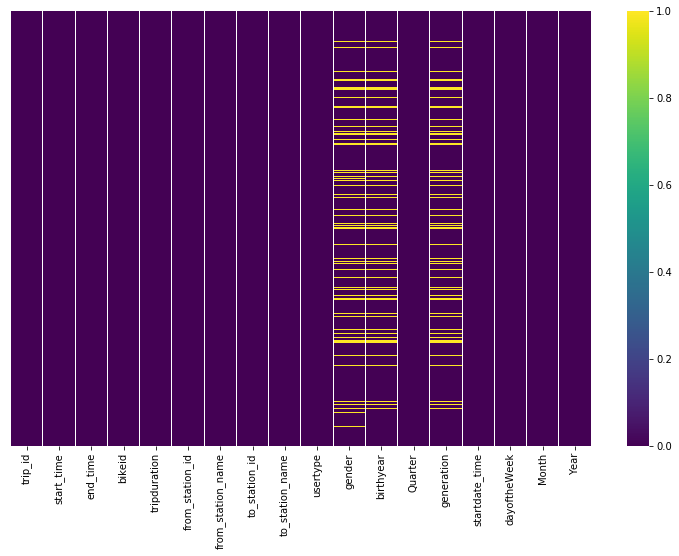

In [4]:
plt.figure(figsize=(13,8))#visualize the missing values
sns.heatmap(dt.isnull(),cmap='viridis',yticklabels=False)#yellow line stands for missing value.

***Part four***<br>
**Data clean**<br>
we found that if tripduration is less than 100 seconds, the departure station is the same with the terminal station. So we think this kind of trips is invalid and we drop this kind of records from the original dataset.

In [4]:
#clean the faulty operation data
print("Before cleaning data: the number of records is ",dt.shape[0])
dt.drop(index=dt[(dt['tripduration']<=100) & (dt['from_station_name']==dt['to_station_name'])].index,inplace=True)
print("After cleaning data: the number of records is ",dt.shape[0])

Before cleaning data: the number of records is  3603082
After cleaning data: the number of records is  3597066


***Part five:***<br>
**Data analyzing and data visualization**<br>
    1. analyze the popular stations of Chicago.
    2. analyze which types of people are more likely to be divvy users.
    3. analyze which time period has more users.

**1. the popular station**<br>

station id numbers where most bikes start:
[(35, 66786), (192, 62604), (77, 51648), (91, 48622), (43, 37965)]
station names where most bikes start: 
[('Streeter Dr & Grand Ave', 66786), ('Canal St & Adams St', 62604), ('Clinton St & Madison St', 51648), ('Clinton St & Washington Blvd', 48622), ('Michigan Ave & Washington St', 37965)]



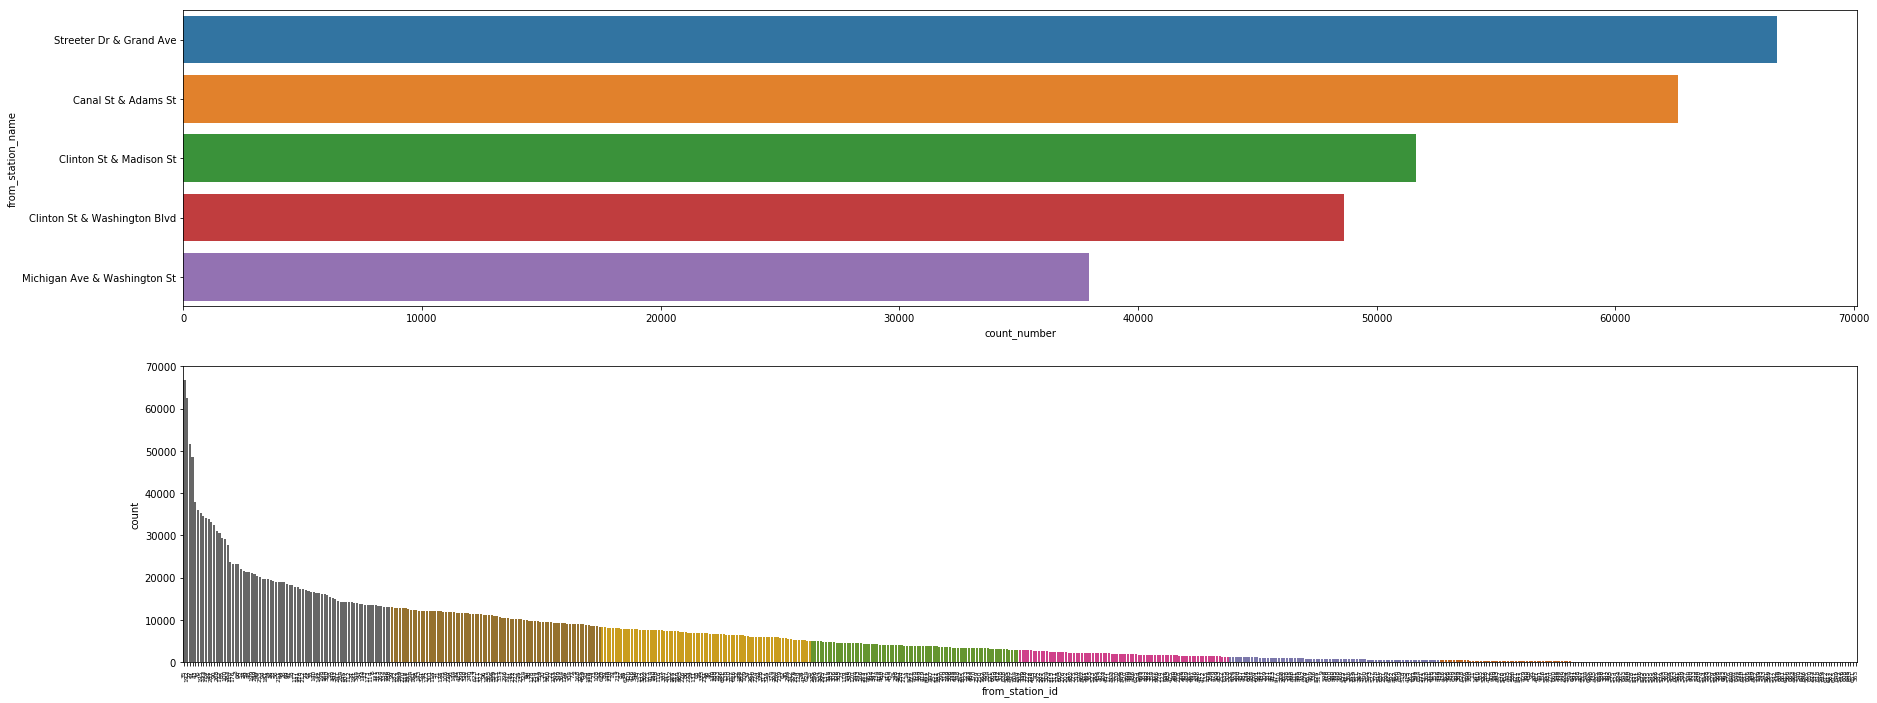

In [7]:
#the station where most bikes start  
print('station id numbers where most bikes start:' )
print(list(Counter(dt['from_station_id']).most_common(5)))#top 5

dn=DataFrame(dt['from_station_name'].value_counts()).reset_index()
dn.columns=['from_station_name','count_number']
di=DataFrame(dt[['from_station_id','from_station_name']])
di.drop(index=di[di['from_station_id'].duplicated(keep='first')].index,inplace=True)
dup=pd.merge(dn,di, on='from_station_name', how='inner')
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 12), sharex=False)

from_station_image=sns.barplot(y=dup.head(5)['from_station_name'],x=dup.head(5)['count_number'],data=dup,ax=ax1)
from_stationid_image=sns.countplot(x='from_station_id', palette="Dark2_r",data=dt,order = dt['from_station_id'].value_counts().index,ax=ax2)
from_stationid_image.set_xticklabels(from_stationid_image.get_xticklabels(),rotation=90,fontsize=6)

print('station names where most bikes start: ')
print(list(Counter(dt['from_station_name']).most_common(5)))#top 5
print()

The first chart above shows most popular departure stations.<br>
The second chart shows the usage of different departure stations in descending order.

station id numbers where most bikes go:
[(35, 78063), (192, 59129), (77, 50024), (91, 47591), (43, 37905)]
station names where most bikes go: 
[('Streeter Dr & Grand Ave', 78063), ('Canal St & Adams St', 59129), ('Clinton St & Madison St', 50024), ('Clinton St & Washington Blvd', 47591), ('Michigan Ave & Washington St', 37905)]



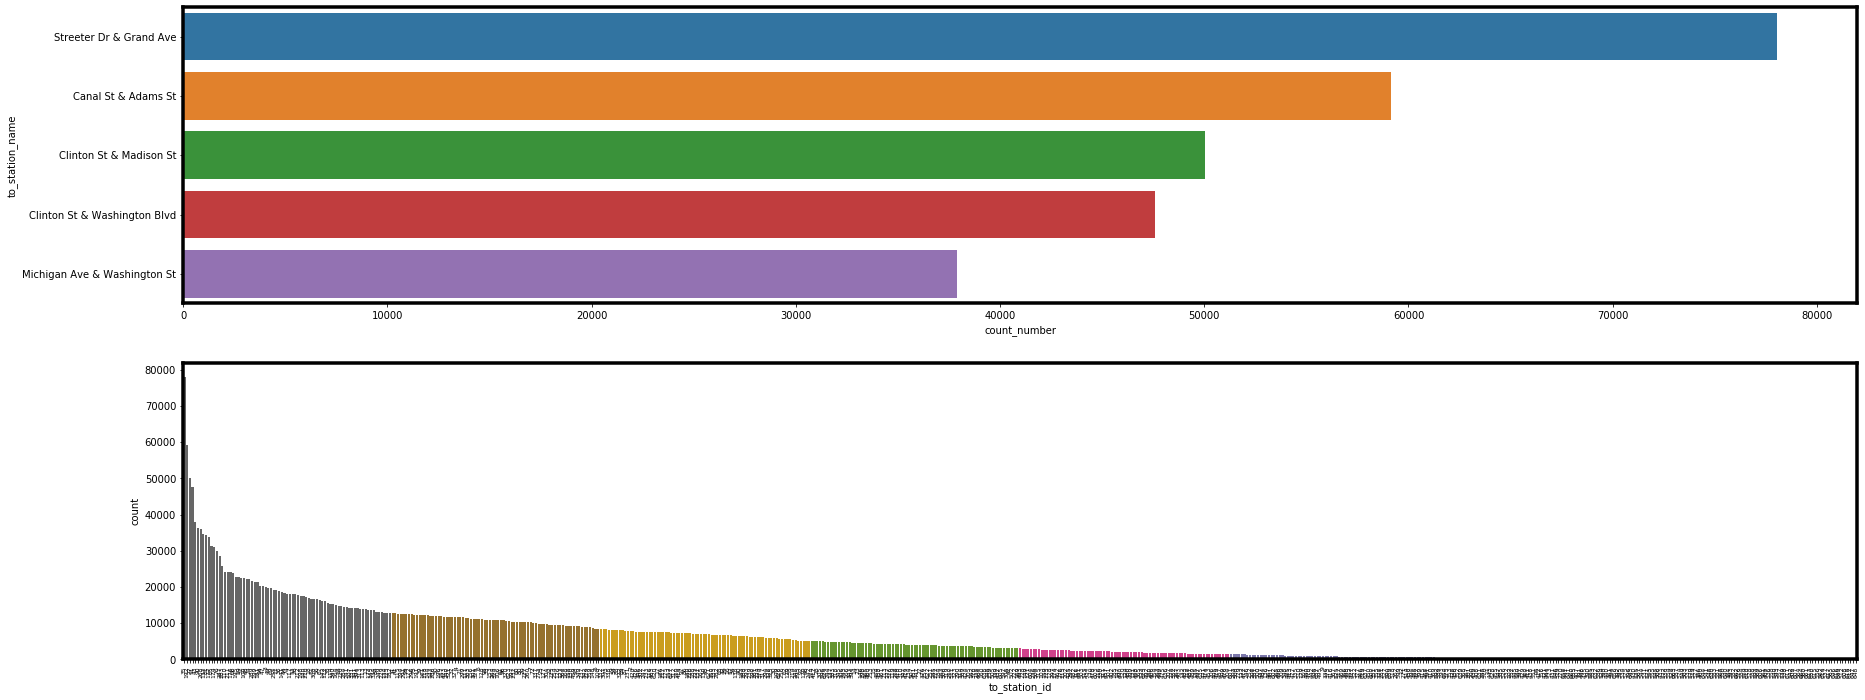

In [19]:
#the station where most bikes go 
print('station id numbers where most bikes go:' )
print(list(Counter(dt['to_station_id']).most_common(5)))#top 5


dnt=DataFrame(dt['to_station_name'].value_counts()).reset_index()
dnt.columns=['to_station_name','count_number']
dit=DataFrame(dt[['to_station_id','to_station_name']])
dit.drop(index=dit[dit['to_station_id'].duplicated(keep='first')].index,inplace=True)
dupt=pd.merge(dnt,dit, on='to_station_name', how='inner')
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 12), sharex=False)
to_station_image=sns.barplot(y=dupt.head(5)['to_station_name'],x=dupt.head(5)['count_number'],data=dupt,ax=ax1)
to_stationid_image=sns.countplot(x='to_station_id',data=dt,palette="Dark2_r",ax=ax2,order = dt['to_station_id'].value_counts().index)
to_stationid_image.set_xticklabels(to_stationid_image.get_xticklabels(),rotation=90,fontsize=6)

print('station names where most bikes go: ')
print(list(Counter(dt['to_station_name']).most_common(5)))#top5
print()

The first chart above shows most popular ternimal stations.<br>
The second chart shows the usage of different departure stations in descending order.

**2. the users analysis**<br>

Counter({'Subscriber': 2921154, 'Customer': 675912})

the most popular usertype is:
[('Subscriber', 2921154)]
the most popular usertype accounts for:81.21%


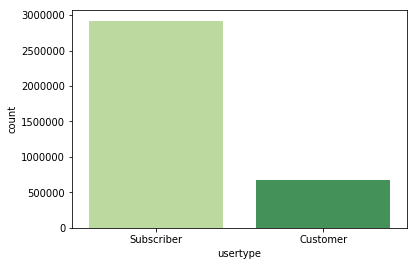

In [7]:
#which kind of usertype is the most popular?
print((Counter(dt['usertype'])))
print()
print('the most popular usertype is:')
print(list(Counter(dt['usertype']).most_common(1)))
print('the most popular usertype accounts for:{:.2%}'.format(Counter(dt['usertype'])['Subscriber']/dt.shape[0]))

usertype_image=sns.countplot(x=dt['usertype'], palette="YlGn",data=dt)

From the chart above we can see that the most popular usertype is subscriber.

Counter({'Male': 2278595, 'Female': 757012, nan: 561459})
[('Male', 2278595)]

Male percent: 63.35%
Female percent: 21.05%
NAN percent: 15.61%



[Text(0, 0.5, 'NAN'), (0, 5500000), Text(0.5, 0, 'The percentage of gender')]

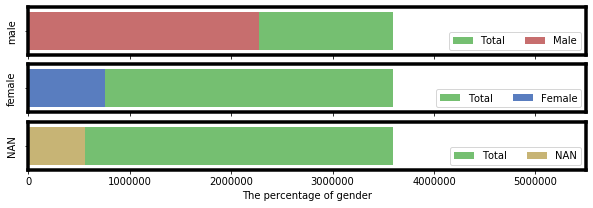

In [13]:
#who prefer to use shared bikes? male or female?
print((Counter(dt['gender'])))
print(list(Counter(dt['gender']).most_common(1)))
print()
print('Male percent: {:.2%}'.format(Counter(dt['gender'])['Male']/dt.shape[0]))
print('Female percent: {:.2%}'.format(Counter(dt['gender'])['Female']/dt.shape[0]))
print('NAN percent: {:.2%}'.format(1-Counter(dt['gender'])['Male']/dt.shape[0]-Counter(dt['gender'])['Female']/dt.shape[0]))
print()

f, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10, 3),sharex=True)
sns.set_color_codes("muted")
sns.barplot(x=dt.shape[0], color="g",label="Total",ax=ax1)
sns.barplot(x=dt['gender'].value_counts()['Male'], data=dt,label="Male", color="r",ax=ax1)
sns.barplot(x=dt.shape[0], color="g",label="Total",ax=ax2)
sns.barplot(x=dt['gender'].value_counts()['Female'], data=dt,label="Female", color="b",ax=ax2)
sns.barplot(x=dt.shape[0], color="g",label="Total",ax=ax3)
sns.barplot(x=dt.shape[0]-dt['gender'].value_counts()['Female']-dt['gender'].value_counts()['Male'], data=dt,
            label="NAN", color="y",ax=ax3)

ax1.legend(ncol=2, loc="lower right", frameon=True)
ax2.legend(ncol=2, loc="lower right", frameon=True)
ax3.legend(ncol=2, loc="lower right", frameon=True)
ax1.set(xlim=(0,5500000),ylabel="male")
ax2.set(xlim=(0,5500000),ylabel="female")
ax3.set(xlim=(0,5500000),ylabel="NAN",xlabel="The percentage of gender")

We find that there are three elements in 'gender', which doesn't make sense.
It means that the column of gender has missing values.
Since the missing percentage is not very huge(15.61%) and we want to better analyze the data, we try to propagate non-null values (male&female) forward in the 'gender' column, which can fill the missing values.

Counter({'Male': 2681259, 'Female': 915807})


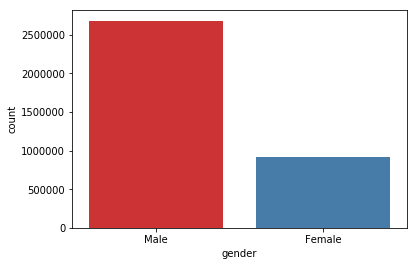

In [9]:
dt['gender'].fillna(method='ffill',axis=0,inplace=True)
print((Counter(dt['gender'])))
gender_fill_image=sns.countplot(x=dt['gender'], palette="Set1",data=dt)

After we fill the missing values, we get the above chart.

After filling up the missing value, the most used generation is  1990.0    1664154
Name: generation, dtype: int64


,generation,counta,countb
0,1990.0,1664154,1390857
1,1980.0,968556,830619
2,1970.0,377685,326301
3,1960.0,297262,256617
4,2000.0,227573,186318
5,1950.0,56690,47729
6,1940.0,3413,2852
7,1920.0,920,819
8,1900.0,375,295
9,1930.0,234,208


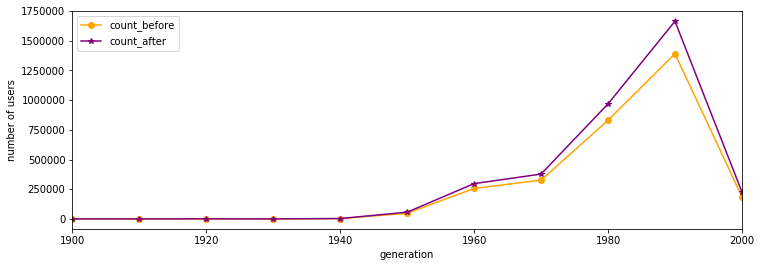

In [5]:
#birthyear?young people like to use shared bikes? how about elder people?

generation_count_b=DataFrame(dt['generation'].value_counts()).reset_index()
generation_count_b.columns=['generation','countb']

dt['birthyear'].fillna(method='ffill',axis=0,inplace=True)
dt['generation'].fillna(method='ffill',axis=0,inplace=True)

print("After filling up the missing value, the most used generation is ",dt['generation'].value_counts().head(1))
generation_count_a=DataFrame(dt['generation'].value_counts()).reset_index()
generation_count_a.columns=['generation','counta']

generation_count=pd.merge(generation_count_a,generation_count_b, on='generation', how='outer')
display(generation_count)
generation_count=generation_count.set_index('generation').sort_index()


plt.figure(figsize=(12,4))
#sns.relplot(x='generation',y='countb', color="orange",kind='line',markers=True,data=generation_count,ax=ax1)
#sns.relplot(x='generation',y='counta', color="purple",kind='line',markers=True,data=generation_count,ax=ax1)
l1=generation_count['countb'].plot(color="orange",kind='line',marker='o',label='count_before')
l2=generation_count['counta'].plot(color="purple",kind='line',marker='*',label='count_after')
plt.xlim((1900, 2000))
plt.ylabel('number of users')
plt.legend( labels = ['count_before', 'count_after'], loc = 'best')

We compared the number of users in different age groups before and after filling in the missing data and drew a line chart to show.

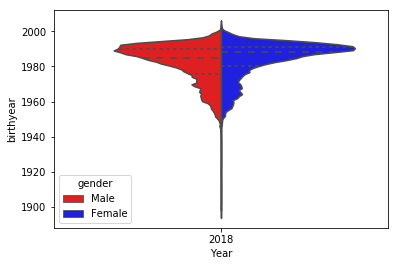

In [12]:
sns.violinplot( x='Year',y="birthyear", hue="gender",
               split=True, inner="quart",
               palette={"Male": "r", "Female": "b"},
               data=dt)

The above chart shows the distribution of the users' age.

**3. the using frequency**<br>

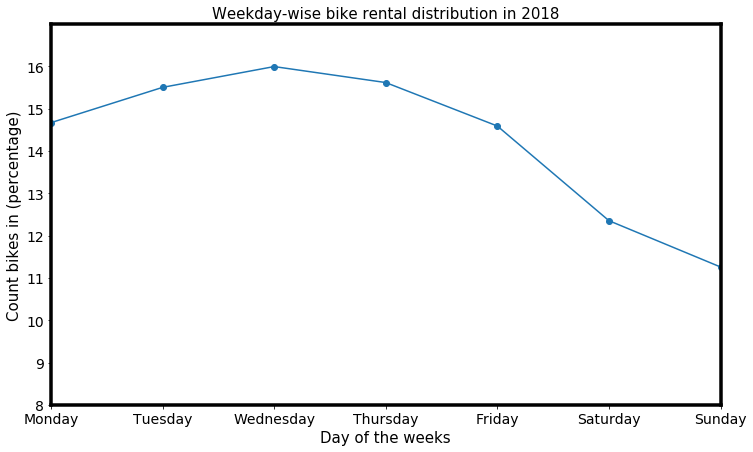

In [7]:
#we can see the distribution across various time: Week, Month
#weekday
dt['StartingTime']=dt['startdate_time'].dt.time
dt['dayoftheWeek'] = pd.Categorical(dt['dayoftheWeek'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)#this line of code is used to make "day of the weeks output in a specific order"

week1=(dt['dayoftheWeek'].value_counts()*100)/len(dt)#percentage
week2 = week1.sort_index()
from pylab import *
plt.figure(figsize=(12,7))
week2.plot(kind='line',marker='o')
plt.ylim(8,max(week2)+1)
plt.xticks(rotation=0,fontsize=14)
plt.yticks(fontsize=14)
plt.title("Weekday-wise bike rental distribution in 2018",fontsize=15)
plt.xlabel("Day of the weeks",fontsize=15)
plt.ylabel("Count bikes in (percentage)",fontsize=15)
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 3.5

The above line plot is showing the bike distribution acrross the week days. Wednesday being on the highest bar we can say that Wesdnesday is the peak day people renting Divvy Bike. The plot clearly indicates that on Saturday and Sunday less number of users are owing the bike in comparison to the week days.

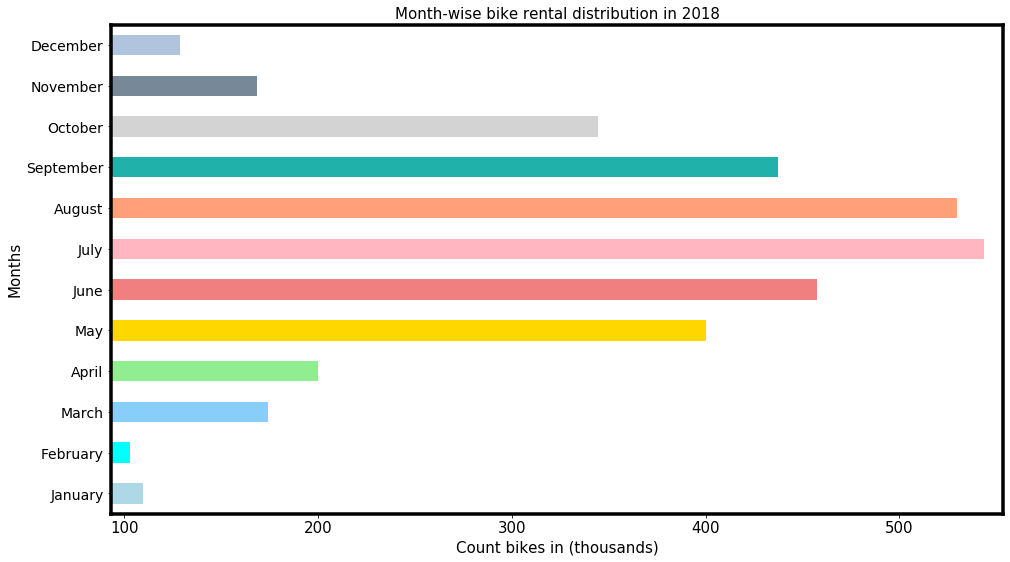

In [17]:
#month-wise distrubution
dt['Month'] = pd.Categorical(dt['Month'], categories= ['January', 'February', 'March', 'April', 'May', 'June', 'July',
'August', 'September', 'October', 'November', 'December'],ordered=True)
month=dt['Month'].value_counts()/1000#make the plot readable，the unit of the vertical axis is k
month = month.sort_index()
from pylab import *
plt.figure(figsize=(16,9))
plt.xlim(min(month)-10,max(month)+10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.title("Month-wise bike rental distribution in 2018",fontsize=15)
plt.xlabel("Count bikes in (thousands)",fontsize=15)
plt.ylabel("Months",fontsize=15)
month.plot(kind='barh',color=['lightblue','cyan','lightskyblue','lightgreen','gold','lightcoral','lightpink','lightsalmon','lightseagreen','lightgray','lightslategray','lightsteelblue'])
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 3.5



The above bar plot is showing the breakdown in months, which is giving a clear indication of the winters in Chicago. July and August being on the highest bar and december, jan and Feb being on the lowest bar.

***Part six***<br>
**New libraries**<br>
1. seaborn<br>
Seaborn is a graphical visualization python libraty based on matplotlib. It provides a highly interactive interface that allows users to make a variety of attractive statistical charts.<br>
Seaborn is actually a more advanced API package based on matplotlib, which makes drawing easier. In most cases, using seaborn can make very attractive plots, and using matplotlib can produce more Featured illustration. Seaborn should be seen as a complement to matplotlib, not a substitute. At the same time it is highly compatible with numpy and pandas data structures. Mastering seaborn can greatly help us observe data and graphs more effectively and understand them more deeply.
2. collections(counter)<br>
The counter function is to traverse all the elements in data structure and record the number of times the elements appear.<br>
we use the counter function to analyze the types of elements in some columns.
3. requests<br>
Requests is a very useful Python HTTP client library, often used when writing crawlers and testing server response data.<br>
we use Requests to collect data from the website in this project.

